In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!ls '/content/drive/MyDrive/Ecommerce Customers.unknown'

'/content/drive/MyDrive/Ecommerce Customers.unknown'


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Ecommerce Customers.unknown')

In [5]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [6]:
df.isnull().sum()

,0
Email,0
Address,0
Avatar,0
Avg. Session Length,0
Time on App,0
Time on Website,0
Length of Membership,0
Yearly Amount Spent,0


In [7]:
df.shape, df.size, df.columns

((500, 8),
 4000,
 Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
        'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
       dtype='object'))

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [9]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [10]:
df.to_csv('/content/drive/MyDrive/ecommerce_customers_clean.csv', index=False)


<Axes: >

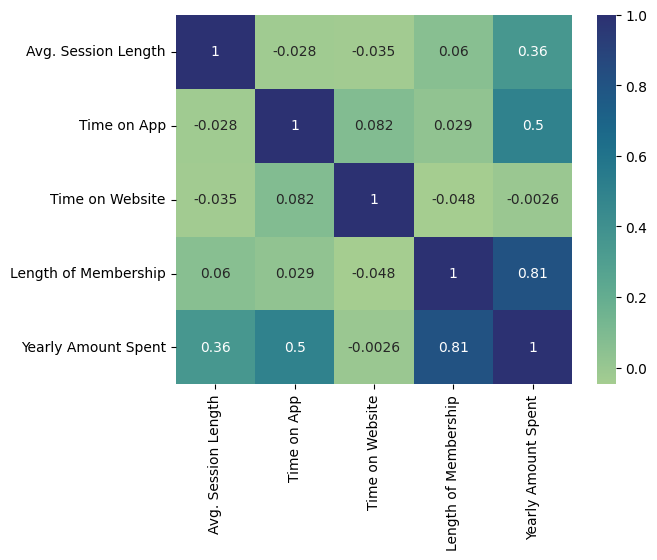

In [11]:
#Correlation
sns.heatmap(df[df.columns[3:]].corr(),cmap="crest",annot = True)

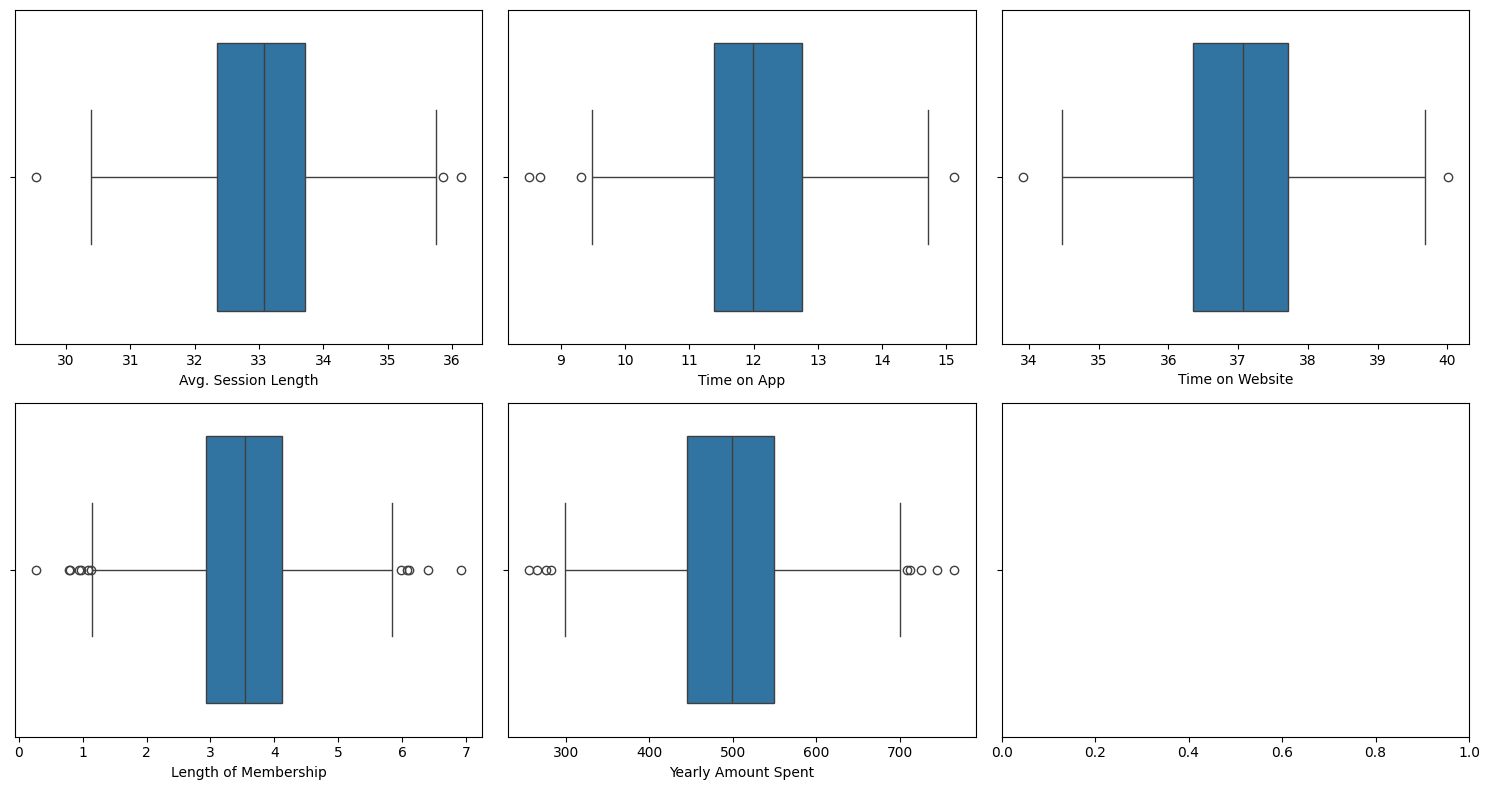

In [12]:
# Data Distribution : Boxplot
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8), sharey=True)

for index, column in enumerate(df.columns[3:]):
    sns.boxplot(data=df, x=column, ax=axes[int(index/3), index%3])

plt.tight_layout()

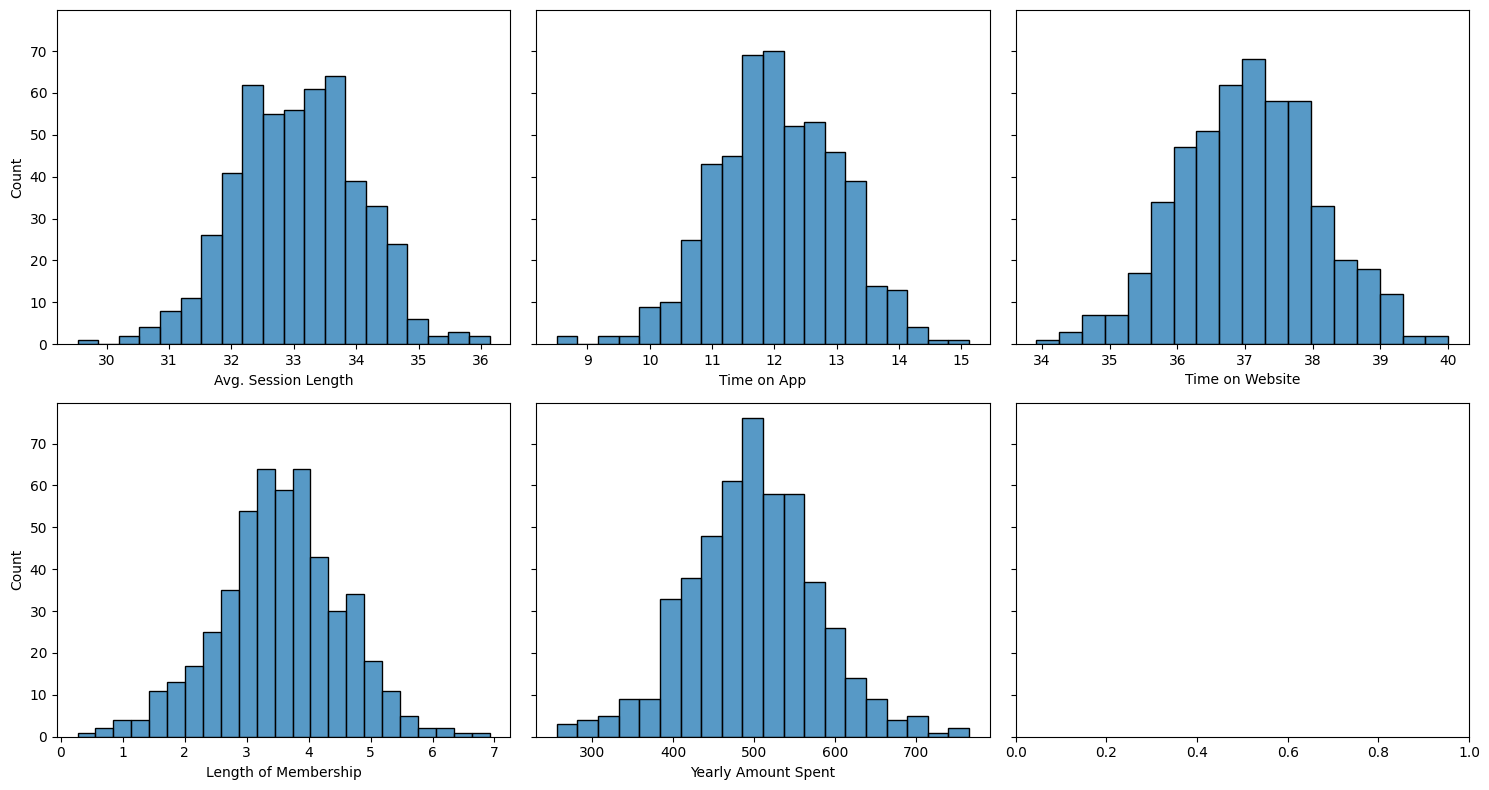

In [13]:
#Histplot
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8), sharey=True)

for index, column in enumerate(df.columns[3:]):
    sns.histplot(data=df, x=column, ax=axes[int(index/3), index%3])

plt.tight_layout()

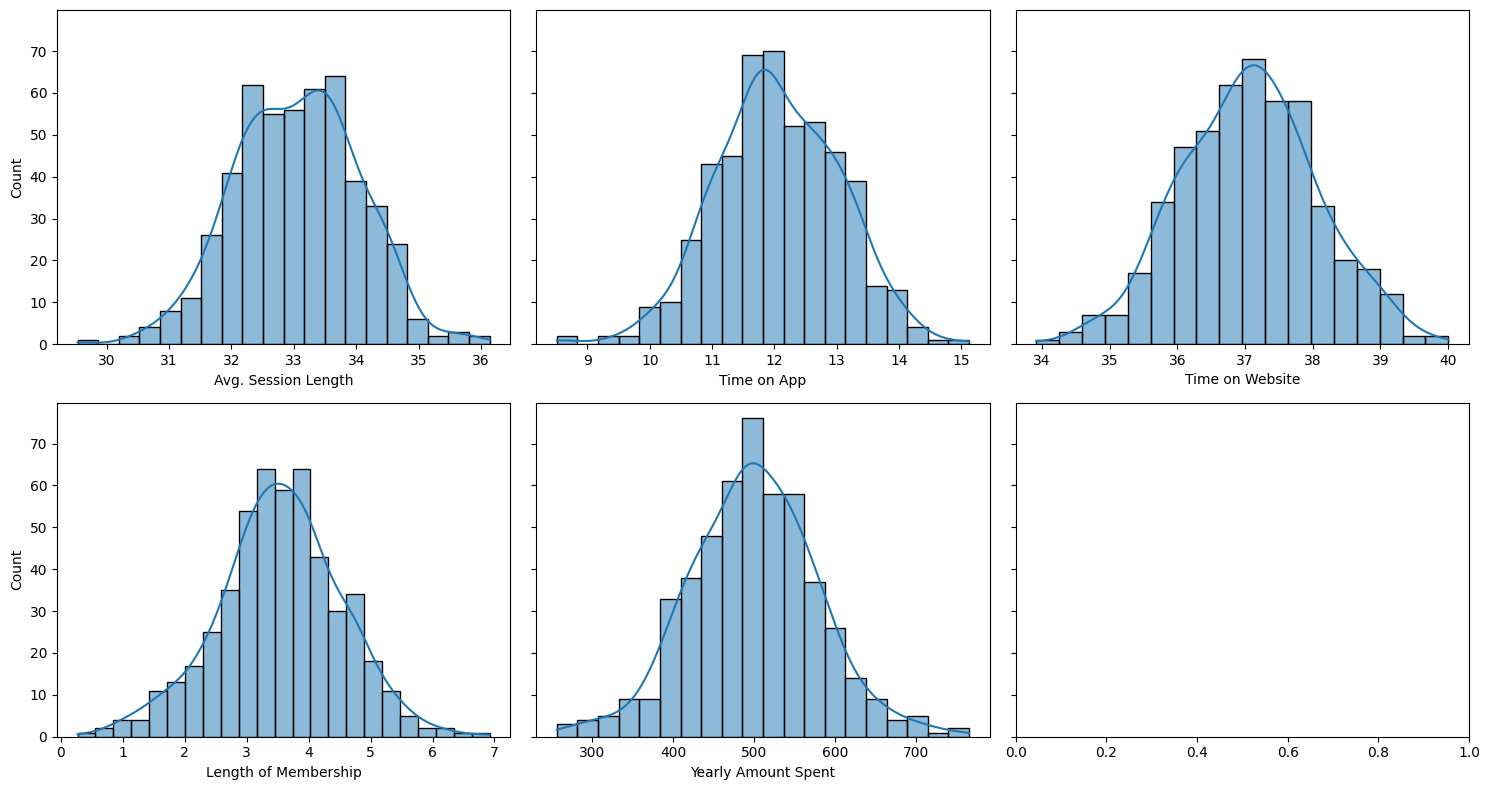

In [14]:
#Histogram
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8), sharey=True)

for index, column in enumerate(df.columns[3:]):
    sns.histplot(data=df, x=column, ax=axes[int(index/3), index%3],kde = True)

plt.tight_layout()

Nan values: 0
Null values: 0


<Axes: >

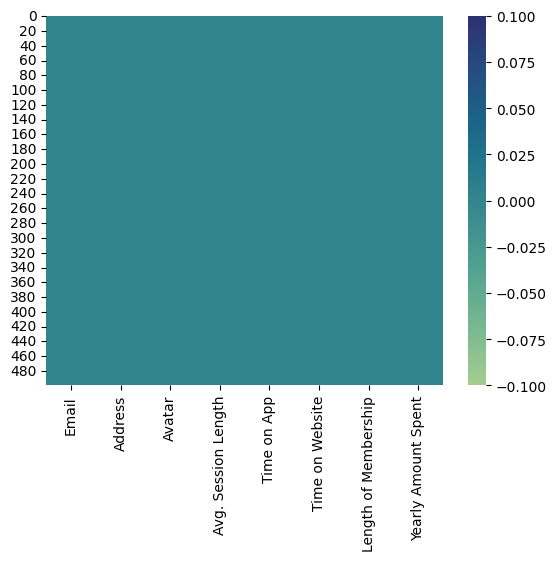

In [15]:
print(f"Nan values: {df.isna().sum().sum()}")
print(f"Null values: {df.isnull().sum(axis=1).sum()}")
sns.heatmap(df.isnull()*df.isna(),cmap="crest")

In [16]:
print(f"Duplicated values: {df.duplicated().sum()}")

Duplicated values: 0


In [17]:
# Total Time & State
df['Total Time'] = df['Time on App'] + df['Time on Website']
df['State'] = df['Address'].apply(lambda x: x.split()[-2])
df['Email Provider'] = df['Email'].apply(lambda x: x.split('@')[1])
df

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Total Time,State,Email Provider
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054,52.233319,MI,fernandez.com
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933,48.378420,CA,hotmail.com
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505,48.440875,DC,yahoo.com
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344,50.438796,OH,gmail.com
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092,50.331842,PR,davidson-herman.com
...,...,...,...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438,49.984144,UT,craig-evans.com
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004,48.886004,CA,gmail.com
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145,49.831985,TN,hotmail.com
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510,49.231509,TX,hotmail.com


In [18]:
# value count function of state and email
df['State'].value_counts(), df["Email Provider"].value_counts()

(State
 AE    18
 AA    17
 SC    13
 MO    13
 DE    13
       ..
 UT     5
 MD     5
 WI     5
 WA     4
 ID     3
 Name: count, Length: 62, dtype: int64,
 Email Provider
 hotmail.com        87
 gmail.com          87
 yahoo.com          76
 davis.com           2
 edwards.com         2
                    ..
 sanchez.org         1
 lowery.net          1
 chan.biz            1
 craig-evans.com     1
 davidson.com        1
 Name: count, Length: 244, dtype: int64)

In [19]:
# customers with max time and spending
s = df.select_dtypes(np.number).idxmax()
pd.Series(data=df.loc[s]['Email'].values, index = s.index)

,0
Avg. Session Length,nathan86@hotmail.com
Time on App,kyang@diaz.org
Time on Website,davisrobert@hicks-smith.com
Length of Membership,asilva@yahoo.com
Yearly Amount Spent,kyang@diaz.org
Total Time,pkline@hotmail.com


In [20]:
# customers with min time and spending
s = df.select_dtypes(np.number).idxmin()
pd.Series(data=df.loc[s]['Email'].values, index = s.index)

,0
Avg. Session Length,knelson@gmail.com
Time on App,dblair@gmail.com
Time on Website,asilva@yahoo.com
Length of Membership,sharongraves@yahoo.com
Yearly Amount Spent,alexandra26@summers-davis.com
Total Time,dblair@gmail.com


In [21]:
# States with the max time and spending
df.groupby(by='State').sum().idxmax()

,0
Email,MP
Address,AP
Avatar,ID
Avg. Session Length,AE
Time on App,AE
Time on Website,AE
Length of Membership,AE
Yearly Amount Spent,AE
Total Time,AE
Email Provider,WV


In [22]:
df.groupby(by='State').sum().idxmin()

,0
Email,OK
Address,AL
Avatar,WI
Avg. Session Length,ID
Time on App,ID
Time on Website,ID
Length of Membership,ID
Yearly Amount Spent,ID
Total Time,ID
Email Provider,AZ


In [23]:
# States with the max time and spending
df.groupby(by='State')['Total Time'].sum().sort_values(ascending=False)

,Total Time
State,
AE,885.844476
AA,843.144204
MO,642.604717
SC,635.988273
DE,634.140286
...,...
CO,244.091906
WI,243.896692
CT,239.158429


In [24]:
# Differnces between customers over spending time and money
df.describe().loc['std',:]

,std
Avg. Session Length,0.992563
Time on App,0.994216
Time on Website,1.010489
Length of Membership,0.999278
Yearly Amount Spent,79.314782
Total Time,1.474820


In [25]:
# Differnces between customers over spending time and money: Coefficient of variation
df.describe().loc['std',:]/df.describe().loc['mean',:]*100

,0
Avg. Session Length,3.002927
Time on App,8.249049
Time on Website,2.726597
Length of Membership,28.280412
Yearly Amount Spent,15.884749
Total Time,3.002916


In [26]:
# Difference between customers over spending time and money
df.describe().loc['max',:]-df.describe().loc['min',:]

,0
Avg. Session Length,6.607234
Time on App,6.618842
Time on Website,6.091334
Length of Membership,6.652788
Yearly Amount Spent,508.847880
Total Time,9.141474


In [27]:
df[df.columns[3:-1]].groupby(by='State').mean().std(axis=0)

,0
Avg. Session Length,0.401449
Time on App,0.336424
Time on Website,0.354953
Length of Membership,0.415163
Yearly Amount Spent,30.478843
Total Time,0.537266


In [28]:
# Differnce between states over spending time and money: Coefficient of variation
df[df.columns[3:-1]].groupby(by='State').mean().std(axis=0) / df[df.columns[3:-1]].groupby(by='State').mean().mean(axis=0)*100

,0
Avg. Session Length,1.215184
Time on App,2.787503
Time on Website,0.958318
Length of Membership,11.758835
Yearly Amount Spent,6.102530
Total Time,1.094045


In [29]:
# Top 5 states spending time on app
# df.groupby(by='State')['Time on App'].sum().sort_values(ascending=False)[:5]
df.groupby(by='State').sum().sort_values(by='Time on App',ascending=False)['Time on App'].head(5)

,Time on App
State,
AE,218.279702
AA,209.622937
MO,156.271069
DE,154.928321
SC,154.071771


In [30]:
# Top 5 customers spending time on app
# df.groupby(by='Email').sum().sort_values(by='Time on App',ascending=False)['Time on App'].head(5)
df.sort_values(by='Time on App',ascending=False)[['Email','Time on App']].head(5)

,Email,Time on App
65,kyang@diaz.org,15.126994
18,alejandro75@hotmail.com,14.715388
260,george02@hotmail.com,14.426491
286,bhill@pierce-kane.info,14.325655
340,vancealicia@hotmail.com,14.288015
